# Import Packages and Pre-trained Models

In [ ]:
!pip install -q -U "tensorflow-text==2.8.*"
!pip install -q tf-models-official==2.7.0

     |████████████████████████████████| 4.9 MB 2.1 MB/s 
     |████████████████████████████████| 462 kB 42.7 MB/s 
     |████████████████████████████████| 1.8 MB 3.9 MB/s 
     |████████████████████████████████| 1.1 MB 26.8 MB/s 
     |████████████████████████████████| 596 kB 38.9 MB/s 
     |████████████████████████████████| 1.2 MB 36.1 MB/s 
     |████████████████████████████████| 237 kB 38.1 MB/s 
     |████████████████████████████████| 352 kB 40.5 MB/s 
     |████████████████████████████████| 99 kB 5.3 MB/s 
     |████████████████████████████████| 90 kB 7.5 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 47.8 MB 77 kB/s 


In [ ]:
!pip install -U scipy

     |████████████████████████████████| 38.1 MB 1.4 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import os
import sys
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import shutil

import tensorflow as tf
import tensorflow_hub as hub
#if running for the first time, please run the second cell first 
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer
import matplotlib.pyplot as plt
tf.get_logger().setLevel('ERROR')
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from scipy.stats import bootstrap

In [ ]:
#mapping to the corresponding directory for each model 
#retrieved from tensorflow website 

bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


# Read Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df_unique.csv to df_unique.csv


In [ ]:
labels_df = pd.read_csv("df_unique.csv")
labels_df = labels_df[["conv_id", "turn_text", "bin_symptoms"]]
labels_df.tail()

,conv_id,turn_text,bin_symptoms
79782,C5163,Mm-hmm.,0
79783,C5163,You going with me now [00:42:00] to check?,0
79784,C5163,I didn’t want to come in with you still changing.,0
79785,C5163,"All right, we need the questionnaire?",0
79786,C5163,"Yeah, but we can do it –",0


# Train-Val-Test Split

In [ ]:
conv_ids, conv_lengths = np.unique(labels_df["conv_id"], return_counts=True)

# Set random seed for replicable result
random.seed(42)

# 0 for training, 1 for validation, 2 for testing
assignment = random.choices(population=[0, 1, 2], weights=[0.8, 0.1, 0.1], k=len(conv_ids))

# Use randomized indices to split embeddings_df dataset
train_idx   = [True if x == 0 else False for x in assignment]
val_idx     = [True if x == 1 else False for x in assignment]
test_idx    = [True if x == 2 else False for x in assignment]

train_convs = conv_ids[train_idx]
val_convs   = conv_ids[val_idx]
test_convs  = conv_ids[test_idx]

def train_val_test_split(x):
    if x in train_convs:
        return 0
    elif x in val_convs:
        return 1
    else:
        return 2

labels_df["assignment"] = labels_df['conv_id'].apply(train_val_test_split)
labels_df[labels_df["bin_symptoms"] == 1]

,conv_id,turn_text,bin_symptoms,assignment
29,C5024,"Yeah, how are you feeling?",1,0
30,C5024,"Uh, so, well, I’ve got, I’ve got hip pains.",1,0
32,C5024,"And I’m not sure if, I assume that’s cancer bu...",1,0
57,C5024,"makes me nervous, if you’re having more pain e...",1,0
63,C5024,"So how, tell me about the pain then.",1,0
...,...,...,...,...
79704,C5163,"Uh, they’re dry. I do have – I have to cream ...",1,0
79705,C5163,But no breakdown of your skin at all?,1,0
79722,C5163,"But only thing is, good thing is, it didn't hu...",1,0
79723,C5163,You weren’t having cramps at all with it?,1,0


In [ ]:
#split into train, val and test 
train_X = labels_df[["turn_text"]][labels_df["assignment"] == 0]
val_X   = labels_df[["turn_text"]][labels_df["assignment"] == 1]
test_X  = labels_df[["turn_text"]][labels_df["assignment"] == 2]

train_y = labels_df[["bin_symptoms"]][labels_df["assignment"] == 0]
val_y   = labels_df[["bin_symptoms"]][labels_df["assignment"] == 1]
test_y  = labels_df[["bin_symptoms"]][labels_df["assignment"] == 2]

In [ ]:
#compute class weight
#I ended up not using this because somehow the model performs better without it 
neg = len(train_y[train_y["bin_symptoms"] == 0])
pos = len(train_y[train_y["bin_symptoms"] == 1])
total = neg + pos

weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.57
Weight for class 1: 3.90


In [ ]:
# Convert to tensor
train_X = tf.convert_to_tensor(train_X)
val_X   = tf.convert_to_tensor(val_X)
test_X  = tf.convert_to_tensor(test_X)

train_y = tf.convert_to_tensor(train_y, dtype=np.int64)
val_y   = tf.convert_to_tensor(val_y, dtype=np.int64)
test_y  = tf.convert_to_tensor(test_y, dtype=np.int64)

# Model

In [ ]:
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.05)(net)
    net = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)
    return tf.keras.Model(text_input, net)

classifier_model = build_classifier_model()

In [ ]:
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

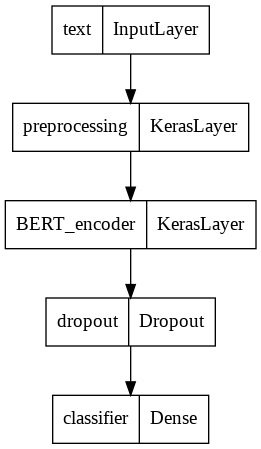

In [ ]:
keras.utils.plot_model(classifier_model)

In [ ]:
#set hyperparameters
#this is the list that I found to be the best performing after lots of trials and errors
epochs = 20
steps_per_epoch = 200
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)
init_lr = 3e-5

#initialize an AdamW optimizer 
optimizer = optimization.create_optimizer(
    init_lr=init_lr,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps,
    optimizer_type='adamw'
)

In [ ]:
#define metrics
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.AUC(name = 'auc'),
    tf.keras.metrics.Recall(name = 'recall'),
    tf.keras.metrics.Precision(name = 'precision')
]

#compile the model 
classifier_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),#using binary ce as the loss 
    metrics=METRICS
)

#add an early stopping condition:
#stop training when the validation auc does not improve for 3 or more epochs 
callback = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=3)

#fit model 
history = classifier_model.fit(
    x=train_X,
    y=train_y, 
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    shuffle=True,
    batch_size=32,
    validation_data=(val_X, val_y),
    validation_steps=50,
    callbacks=[callback],
#     class_weight=class_weight
)


Epoch 1/20
200/200 [==============================] - 112s 485ms/step - loss: 0.3806 - accuracy: 0.8533 - auc: 0.6968 - recall: 0.0991 - precision: 0.3539 - val_loss: 0.3909 - val_accuracy: 0.8400 - val_auc: 0.8346 - val_recall: 0.3294 - val_precision: 0.8000
Epoch 2/20
200/200 [==============================] - 95s 477ms/step - loss: 0.2600 - accuracy: 0.9023 - auc: 0.8480 - recall: 0.3586 - precision: 0.6699 - val_loss: 0.3404 - val_accuracy: 0.8706 - val_auc: 0.8780 - val_recall: 0.4647 - val_precision: 0.8634
Epoch 3/20
200/200 [==============================] - 95s 476ms/step - loss: 0.2454 - accuracy: 0.9108 - auc: 0.8772 - recall: 0.4453 - precision: 0.7510 - val_loss: 0.3032 - val_accuracy: 0.8913 - val_auc: 0.8889 - val_recall: 0.5735 - val_precision: 0.8705
Epoch 4/20
200/200 [==============================] - 96s 478ms/step - loss: 0.2333 - accuracy: 0.9136 - auc: 0.8913 - recall: 0.4871 - precision: 0.7481 - val_loss: 0.3152 - val_accuracy: 0.8825 - val_auc: 0.8864 - val_re

In [ ]:
#see performance on the testing set 

classifier_model.evaluate(
    x=test_X,
    y=test_y
)

212/212 [==============================] - 43s 201ms/step - loss: 0.2229 - accuracy: 0.9139 - auc: 0.9287 - recall: 0.5966 - precision: 0.7671


[0.22293074429035187,
 0.913877010345459,
 0.9287094473838806,
 0.5965965986251831,
 0.7670527696609497]

In [ ]:
#a function to how the metrics changed throughout history 

def plot_metrics(metrics, history):
  history_dict = history.history
  fig, ax = plt.subplots(2, 2, figsize = (10, 10))
  idx = 0
  for i in range(2):
    for j in range(2):
      train_history = history_dict[metrics[idx]]
      val_history = history_dict['val_' + metrics[idx]]
      epochs = range(1, len(train_history) + 1)
      ax[i,j].plot(epochs, train_history, 'r', label='Training ' + metrics[idx])
      ax[i,j].plot(epochs, val_history, 'b', label='Validation ' + metrics[idx])
      ax[i,j].set(
          xlabel = 'epochs', 
          ylabel = metrics[idx]
      )
      ax[i,j].legend()
      idx += 1

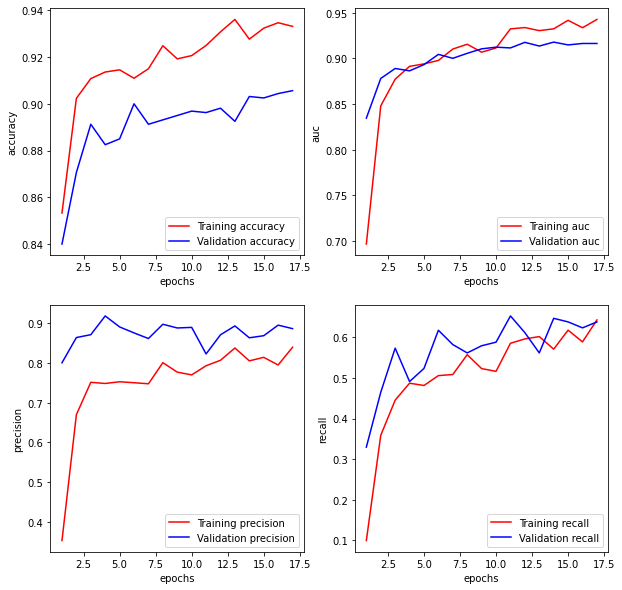

In [ ]:
#plot history 
plot_metrics(metrics = ['accuracy', 'auc', 'precision', 'recall'], history = history)

# Save Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
classifier_model.save('/content/drive/My Drive/bert_nn.h5')

# Load Model

In [ ]:
#if you are loading the model without running previous cells
#make sure you initialize an AdamW optimizer before loading the model 
epochs = 20
steps_per_epoch = 200
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)
init_lr = 3e-5

optimizer2 = optimization.create_optimizer(
    init_lr=init_lr,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps,
    optimizer_type='adamw'
)

In [ ]:
#load the model 
loaded_model = tf.keras.models.load_model('/content/drive/My Drive/bert_nn.h5', custom_objects={'AdamWeightDecay': optimizer2, 'KerasLayer':hub.KerasLayer})

In [ ]:
#evaluate the testing performance 
loaded_model.evaluate(
    x=test_X,
    y=test_y
)

212/212 [==============================] - 44s 205ms/step - loss: 0.2229 - accuracy: 0.9139 - auc: 0.9287 - recall: 0.5966 - precision: 0.7671


[0.22293074429035187,
 0.913877010345459,
 0.9287094473838806,
 0.5965965986251831,
 0.7670527696609497]

## Get Confidence Interval 

In [ ]:
preds = loaded_model.predict(test_X)

In [ ]:
np.save('/content/drive/My Drive/y_true',test_y)
np.save('/content/drive/My Drive/y_pred_bert_orig',preds)

In [ ]:
functions = {
    'Accuracy': accuracy_score,
    'AUC': roc_auc_score,
    'Precision': precision_score,
    'Recall': recall_score
}

for name, func in functions.items():
  if name != 'AUC':
    res = bootstrap((test_y,preds > 0.5), func, vectorized = False, paired = True, random_state = 42, method = 'basic', n_resamples = 1000)
  else:
    es = bootstrap((test_y,preds), func, vectorized = False, paired = True, random_state = 42, method = 'basic', n_resamples = 1000)
  mid = (res.confidence_interval.high + res.confidence_interval.low)/2
  print( name + ': '+ str(round(mid[0], 2)) +  '+-' +  str(round(res.confidence_interval.high[0] - mid[0],2)))


Accuracy: 0.91+-0.01
AUC: 0.91+-0.01
Precision: 0.77+-0.03
Recall: 0.6+-0.03


# Qualitative Analysis

## Plot Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(test_y, preds)

print(cf_matrix)

[[5601  181]
 [ 403  596]]


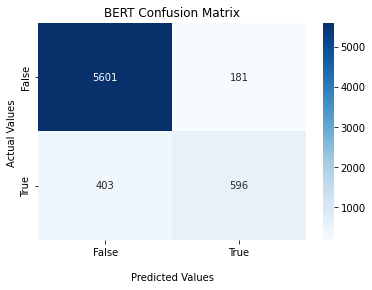

In [ ]:
import seaborn as sn
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('BERT Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## True Positives

In [ ]:
test_X[(test_y == 1) & (preds == 1)][:10]

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b'Sick to my stomach and diarrhea.',
       b'Okay. Is there any chance of getting maybe some Zofran or something? The Compazine just \xe2\x80\x93',
       b'All right. Zofran, yeah, we can do Zofran.',
       b'I have no pain here. No pain, okay? But right here, oh my god, oh my god.',
       b"Yeah, it gets better but when I get these pains, I know I got to shit. I'm sorry, Jean. Sorry, Doc.",
       b"When I go to the bathroom, it's buckling over. You know what I'm saying? It's like \xe2\x80\x93",
       b"You're getting cramping pain.",
       b"I feel like he's not getting any nutrition either because as soon as he eats, within ten minutes he's in the bathroom and like he's running.",
       b'Tonight. Okay. Other than being nauseous, now I have been throwing up.',
       b"I'm going to be honest with ya. It seems like if I take Compazine and Imodium, I throw up about a \xe2\x80\x93 it's just a matter of time. Just a matter of t

## True Negatives

In [ ]:
test_X[(test_y == 0) & (preds == 0)][:10]

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b'Okay, conversation C7230, 7230.', b'You wait outside?',
       b"I'm here.", b'Hey, Nicole. Thanks.', b"It's over here too.",
       b"I think it's hernia.",
       b'Probably not. We can show him. _____ _____ _____ _____.',
       b"All right, they need to get somebody in a room then because there's no one in.",
       b'Hey, Doc.', b'Hello.'], dtype=object)>

## False Positives 

In [ ]:
test_X[(test_y == 0) & (preds == 1)][:10]

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"I could eat something, I'd feel a lot better.",
       b'Once a day both of them. On my week off, about Tuesday I start feeling 100 percent. But like today \xe2\x80\x93',
       b"Okay. Then me and my friend the Luvinox, how \xe2\x80\x93 I mean, when does it get too high, when you're getting too close to the muscles?",
       b"Yeah. I'm getting pretty good letting it go completely limp and then just kind of letting it come out. That seems to help some.",
       b'Sneakers?', b'And the prednisone.', b'Is he eating good now?',
       b"He said he didn't understand why he was \xe2\x80\x93 you know, he said they don't find any infection, there's no fever-like infection.",
       b"And prednisone's for your bones.",
       b'The swallowing at times, I guess.'], dtype=object)>

## False Negatives

In [ ]:
test_X[(test_y == 1) & (preds == 0)][:10]

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b'Did you get better during the week off?',
       b'Oh my, yeah. Oh my, yeah.',
       b'What about in the week off? Does that get better?', b'No.',
       b"Yeah. So what happens is the Xeloda is not allowing proper colon function, and you don't absorb as much water so you got \xe2\x80\x93",
       b"Not from anything I gave you to read. No, I have not heard that. In fact, the Zaloda, while it may be contributing to some thinning, shouldn't be causing it, but the _____ can, so \xe2\x80\x93",
       b'I know. I just used to have hair. We grew attached to each other.',
       b'He could probably figure it out, yeah, but I walk in, and he goes, "Oh, you got a haircut," and he was absolutely serious. I go, "Oh, that\'s a low blow, man," and then he realizes what\'s happening. He goes, "Oh, I\'m sorry." I said, "Yeah, I told my oncologist to take a little off the top, and he took a little bit too much."',
       b"Yeah, but it actually 